In [3]:
pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 173.5 MB 11 kB/s               
Note: you may need to restart the kernel to use updated packages.


In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xgboost as xgb
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
df_t = pd.read_csv('./input/titanic/train.csv', index_col=0)
df_t['Type']='Train'
df_t.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train


In [16]:
dfval = pd.read_csv('./input/titanic/test.csv', index_col=0)
dfval['Type']='Test'
dfval['Survived']=''
dfval.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type,Survived
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Test,
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Test,
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Test,


In [224]:
df = pd.concat([df_t, dfval])
df['Survived']=pd.to_numeric(tdf['Survived'])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test


In [18]:
df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Type           0
dtype: int64

In [23]:
for col in list(df):
    if ((df[col].dtype =='object') and (df[col].name !='Name')):
        print(df.groupby([col])['Survived'].count().sort_values(ascending=False).head(5))

Survived
0    549
     418
1    342
Name: Survived, dtype: int64
Sex
male      843
female    466
Name: Survived, dtype: int64
Ticket
CA. 2343        11
1601             8
CA 2144          8
S.O.C. 14879     7
PC 17608         7
Name: Survived, dtype: int64
Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
F4                 4
Name: Survived, dtype: int64
Embarked
S    914
C    270
Q    123
Name: Survived, dtype: int64
Type
Train    891
Test     418
Name: Survived, dtype: int64


In [25]:
# Get an idea of how many new features we'll get from dummy explosion
for col in list(df):
    if (df[col].dtype =='object'):
        print('col:', col, 'unique vals: ', df[col].nunique() )

col: Survived unique vals:  3
col: Name unique vals:  1307
col: Sex unique vals:  2
col: Ticket unique vals:  929
col: Cabin unique vals:  186
col: Embarked unique vals:  3
col: Type unique vals:  2


In [41]:
#Cabin can be dropped, value is missing for all PClass
print(df[df['Cabin'].isna()]['Pclass'].value_counts())
print(df[df['Cabin'].isna()]['Survived'].value_counts())
#df[df['Cabin'].isna()]#['Pclass'].value_counts()

3    693
2    254
1     67
Name: Pclass, dtype: int64
0    481
     327
1    206
Name: Survived, dtype: int64


In [29]:
df[df['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Train
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Train


In [34]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
#embarked can be dropped, its port of entry
df[df['Embarked']=='C'].sample(10)

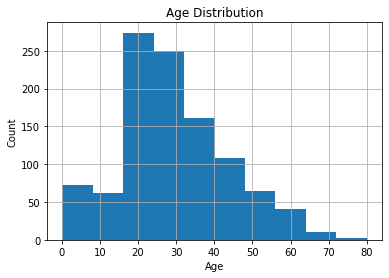

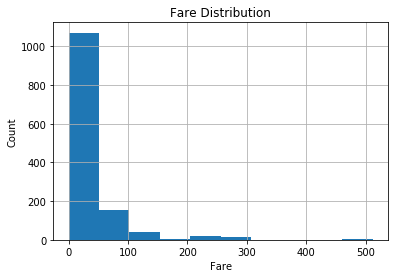

In [220]:
# Age distribution
plt.hist(df['Age'])
plt.grid(True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Fare distribution
plt.hist(df['Fare'])
plt.grid(True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

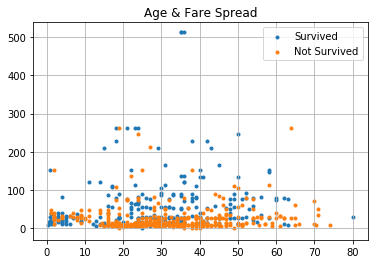

In [233]:
plt.title('Age & Fare Spread')
plt.scatter(df[df['Survived']==1].Age,df[df['Survived']==1].Fare,label='Survived',marker='.')
plt.scatter(df[df['Survived']==0].Age,df[df['Survived']==0].Fare,label='Not Survived',marker='.')
plt.grid(True)
plt.legend()
plt.show()

In [36]:
df[df['Age'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
PassengerId,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Train
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Train
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Train
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Train
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Test
1302,,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Test
1305,,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test


In [ ]:
#no outliers in age
df[df['Age']>70]

In [38]:
#age missing for 20% date, assign mean or 0 (new col flag)
df['Age'].mean()

29.881137667304014

In [37]:
#fare combined for some cabins and may be based on port of entry, may influence incorrect results, will try
df[df['Fare']>200]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
PassengerId,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Train
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Train
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Train
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Train
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Train
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Train
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Train
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,Train
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,Train


In [73]:
def transform_df(dfx):
    tdf = dfx[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' , 'Embarked', 'Type']]
    
    #tdf['Age_Exists'] = tdf['Age'].isnull()
    #tdf['Age_Exists'] = tdf['Age_Exists'].apply(lambda x: 0 if x is True else 1)
    #tdf['Age'].fillna(df['Age'].mean(), inplace=True)
    #tdf['Age'].fillna(0, inplace=True)
    tdf['Age'] = tdf.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(round(x.median())))
    
    #tdf['Fare'].fillna(0, inplace=True)
    tdf['Fare'] = tdf.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))
    
    s=tdf['Embarked'].mode()
    tdf['Embarked'].fillna(s[0], inplace=True)
    
    tdf['Sex'].replace({'male':0, 'female':1}, inplace=True)
    tdf['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True)
    
    return tdf


In [215]:
tdf=transform_df(df)
tdf.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Type
PassengerId,,,,,,,,,
150,0,2,0,42.0,0,0,13.0000,0,Train
718,1,2,1,27.0,0,0,10.5000,0,Train
301,1,3,1,22.0,0,0,7.7500,2,Train
263,0,1,0,52.0,1,1,79.6500,0,Train
75,1,3,0,32.0,0,0,56.4958,0,Train


In [213]:
import numpy as np
bins = np.linspace(tdf['Fare'].min(),tdf['Fare'].max(),8)
print(bins)
labels=[0,1,2,3,4,5,6]
#tdf['FareBins'] = pd.cut(df['Fare'], bins=bins, labels=labels, include_lowest=True)
#tdf['AgeBins'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
tdf

[  0.          73.18988571 146.37977143 219.56965714 292.75954286
 365.94942857 439.13931429 512.3292    ]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Type,FareBins,AgeBins
PassengerId,,,,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,0,Train,0.0,0
2,1.0,1,1,38.0,1,0,71.2833,1,Train,0.0,0
3,1.0,3,1,26.0,0,0,7.9250,0,Train,0.0,0
4,1.0,1,1,35.0,1,0,53.1000,0,Train,0.0,0
5,0.0,3,0,35.0,0,0,8.0500,0,Train,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,0,25.0,0,0,8.0500,0,Test,0.0,NaN
1306,NaN,1,1,39.0,0,0,108.9000,1,Test,1.0,0
1307,NaN,3,0,38.5,0,0,7.2500,0,Test,0.0,0


In [58]:
tdf.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Type        0
dtype: int64

In [214]:
#tdf[tdf['Type']=='Train'].corr()
#tdf[['Pclass','Survived']].corr()
tdf['Survived']=pd.to_numeric(tdf['Survived'])
#tdf['FareBins']=pd.to_numeric(tdf['FareBins'])
tdf.dtypes
tdf.corr()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareBins
Survived,1.000000,-0.338481,0.543351,-0.058760,-0.035322,0.081629,0.257307,0.106811,0.210552
Pclass,-0.338481,1.000000,-0.124617,-0.452109,0.060832,0.018322,-0.558742,0.038875,-0.452518
Sex,0.543351,-0.124617,1.000000,-0.074807,0.109609,0.213125,0.185746,0.120423,0.151868
Age,-0.058760,-0.452109,-0.074807,1.000000,-0.204202,-0.134405,0.198515,-0.026554,0.181305
SibSp,-0.035322,0.060832,0.109609,-0.204202,1.000000,0.373587,0.160389,-0.073461,0.045024
Parch,0.081629,0.018322,0.213125,-0.134405,0.373587,1.000000,0.221668,-0.095523,0.122999
Fare,0.257307,-0.558742,0.185746,0.198515,0.160389,0.221668,1.000000,0.061338,0.950324
Embarked,0.106811,0.038875,0.120423,-0.026554,-0.073461,-0.095523,0.061338,1.000000,0.084516
FareBins,0.210552,-0.452518,0.151868,0.181305,0.045024,0.122999,0.950324,0.084516,1.000000


In [75]:
x = tdf[tdf['Type']=='Train'][['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' , 'Embarked']] #, 'Age_Exists']]
y = tdf[tdf['Type']=='Train'][['Survived']]
#x = pd.get_dummies(x, drop_first=True)
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.193232,0.523008,0.381594,32.204208,0.361392
std,0.836071,0.477990,13.338099,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.001, random_state=42)


In [77]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(x_train, y_train)
train_model2 = model2.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19:35:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:35:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [144]:
#prediction and Classification Report
pred1 = train_model1.predict(x_test)
pred2 = train_model2.predict(x_test)
pred1=list(pred1)
pred2=list(pred2)

In [125]:
yt=list(y_test['Survived'])


In [128]:
print('Model 1 XGboost Report:')
r1=classification_report(yt, pred1)
print(r1)
r2=classification_report(yt, pred2)
print(r2)

Model 1 XGboost Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84        54
           1       0.74      0.86      0.79        36

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.78      0.81      0.79        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



In [139]:
model3 = xgb.XGBClassifier(n_estimators=80, max_depth=8, learning_rate=0.1, subsample=0.5, gamma=0, min_child_weight=2, objective= 'binary:logistic')

train_model3 = model3.fit(x_train, y_train)
pred3 = train_model3.predict(x_test)
print(classification_report(yt, list(pred3)))

[22:05:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.77      0.83      0.80        36

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



In [134]:
dfsub = pd.read_csv('./input/titanic/gender_submission.csv', index_col=0)
dfsub

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
#prediction using the model with test data
dfval=transform_df(dfval)
dfval.sample(5)
xv=dfval[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']] 
x_val = pd.get_dummies(xv, drop_first=True)
pred_sub = train_model3.predict(x_val)


In [ ]:
len(pred_sub)
dfsub['Survived']=pred_sub
dfsub.to_csv('submission.csv') #, index=False)

In [ ]:
df2=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')#, Index=False)
df2

In [ ]:
df2.to_csv('submission.csv') #, index=False)

In [180]:
from sklearn.ensemble import RandomForestClassifier

#model3 = xgb.XGBClassifier(n_estimators=80, max_depth=8, learning_rate=0.1, subsample=0.5, gamma=0, min_child_weight=2, objective= 'binary:logistic')

modelrf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=2)
modelrf.fit(x_train, yt1)
predrf = modelrf.predict(x_test)

print(classification_report(yt, list(predrf)))

ValueError: Found input variables with inconsistent numbers of samples: [90, 1]

In [183]:
x_val = tdf[tdf['Type']=='Test'][['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' , 'Embarked']]

In [184]:
#final run for all train data
from sklearn.ensemble import RandomForestClassifier

#model3 = xgb.XGBClassifier(n_estimators=80, max_depth=8, learning_rate=0.1, subsample=0.5, gamma=0, min_child_weight=2, objective= 'binary:logistic')

modelrf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=2)
yt1=list(y_train['Survived'])
modelrf.fit(x_train, yt1)
predrf = modelrf.predict(x_val)


submission = pd.read_csv('./input/titanic/gender_submission.csv')
submission['Survived'] = predrf
submission.to_csv('submission.csv', index=False)